In [177]:
import numpy as np
import pandas as pd

In [178]:
dataset= pd.read_csv('loan_data_sample.csv')

In [179]:
print(len(dataset))
print(dataset.head())

9578
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0       

In [180]:
print(dataset.shape)

(9578, 14)


In [181]:
dataset.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [182]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [183]:
print(dataset.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [184]:
df1= pd.get_dummies(dataset['purpose'],drop_first=True)

In [185]:
df1.dtypes

,0
credit_card,bool
debt_consolidation,bool
educational,bool
home_improvement,bool
major_purchase,bool
small_business,bool


In [186]:
loan= pd.concat([dataset,df1],axis=1).drop('purpose', axis=1)
loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [187]:
loan.shape

(9578, 19)

In [188]:
loan.dtypes

,0
credit.policy,int64
int.rate,float64
installment,float64
log.annual.inc,float64
dti,float64
fico,int64
days.with.cr.line,float64
revol.bal,int64
revol.util,float64
inq.last.6mths,int64


In [189]:
import sklearn
from sklearn.model_selection import train_test_split
x= loan.drop('not.fully.paid', axis=1)
y= loan['not.fully.paid']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [190]:
from sklearn.tree import DecisionTreeClassifier
entropy= DecisionTreeClassifier(criterion='entropy', random_state=0)
entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [191]:
prediction= entropy.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [192]:
print(metrics.classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1612
           1       0.19      0.21      0.20       304

    accuracy                           0.73      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.73      0.74      1916

0.7343423799582464


In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier(random_state=0)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='accuracy', cv=5,
                           n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Update the model with the best parameters
best_dt = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score:  0.8196300194672812


In [194]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Create a DecisionTreeClassifier with the best parameters
best_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=0
)

# Train the model with the training data
best_dt.fit(x_train, y_train)

# Make predictions on the test data
predictions = best_dt.predict(x_test)

# **Evaluation**

In [195]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate the model of gridsearch params
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Classification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1612
           1       0.19      0.05      0.08       304

    accuracy                           0.81      1916
   macro avg       0.51      0.50      0.49      1916
weighted avg       0.74      0.81      0.77      1916

Accuracy: 0.8147
Confusion Matrix:
[[1546   66]
 [ 289   15]]


# **Visualisation**

In [196]:
import matplotlib.pyplot as plt

text_representation= sklearn.tree.export_text(entropy)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_17 <= 0.50
|   |   |--- feature_9 <= 5.50
|   |   |   |--- feature_5 <= 729.50
|   |   |   |   |--- feature_3 <= 12.11
|   |   |   |   |   |--- feature_3 <= 9.83
|   |   |   |   |   |   |--- feature_2 <= 33.55
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  33.55
|   |   |   |   |   |   |   |--- feature_5 <= 694.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 420.00
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 374.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  374.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_6 >  420.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 9.60
|   |   |   |   

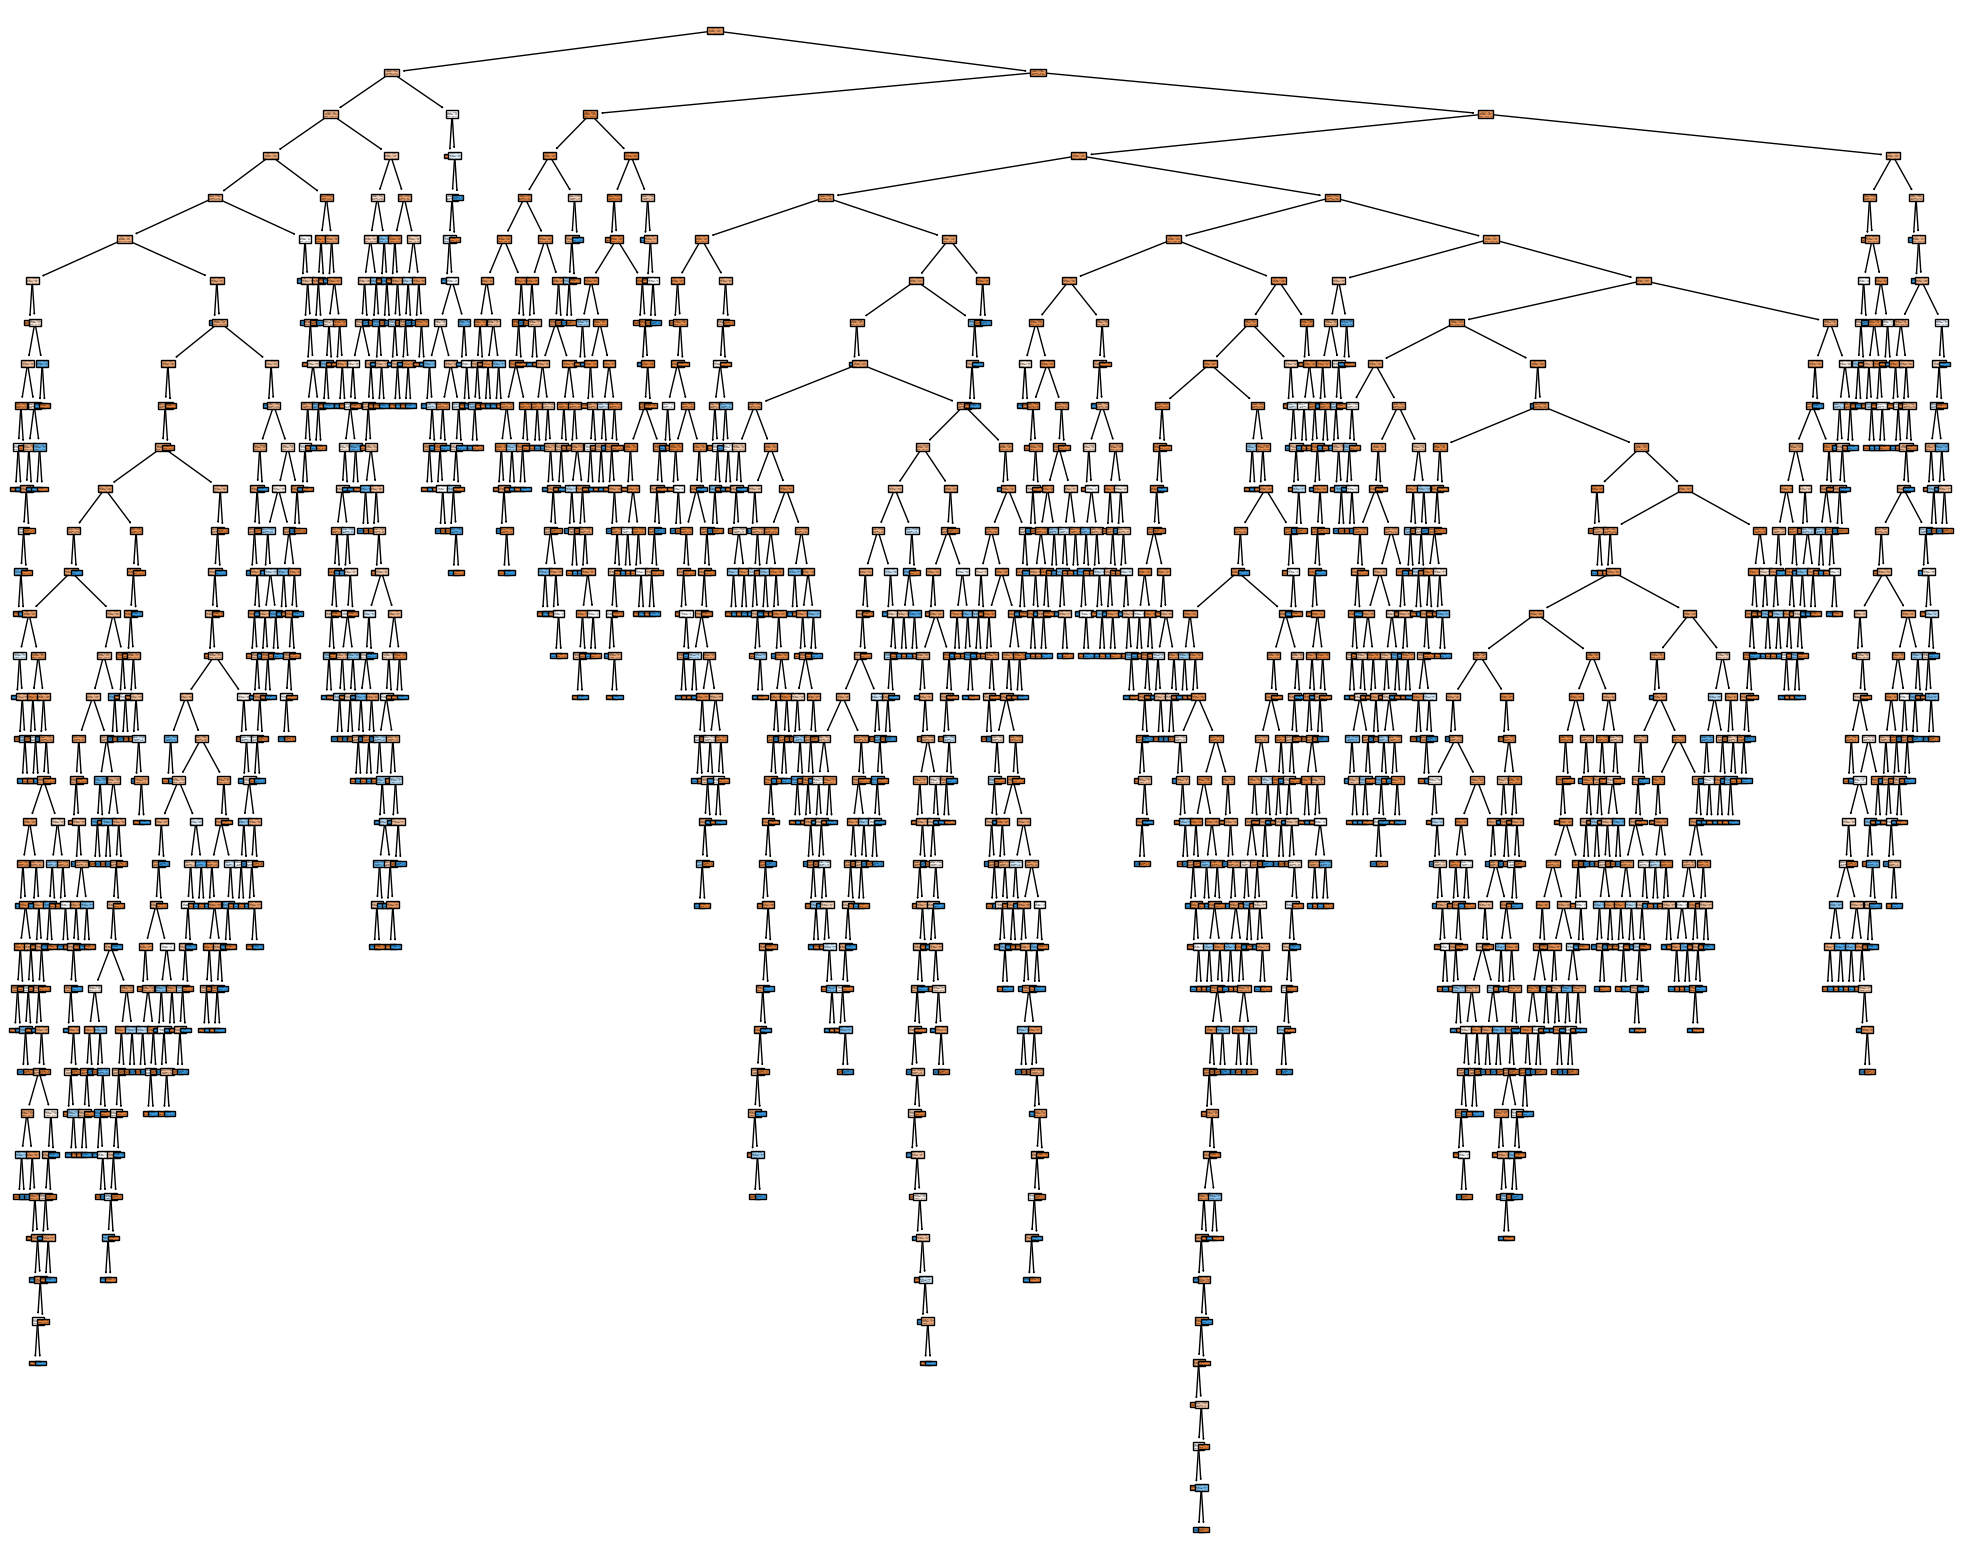

In [197]:
fig= plt.figure(figsize=(25,20))
sklearn.tree.plot_tree(entropy, filled=True)
plt.show()

[[1342  270]
 [ 239   65]]


<Axes: >

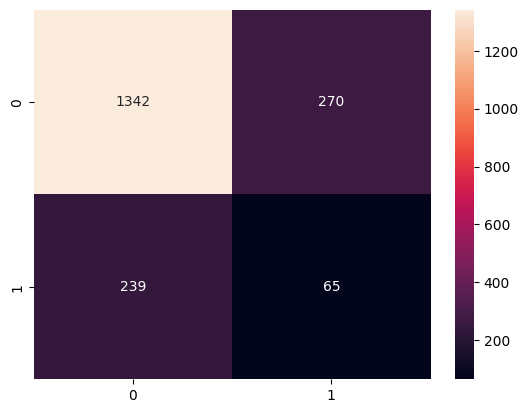

In [198]:
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
metric=confusion_matrix(y_test, prediction)
print(metric)
sns.heatmap(metric, annot=True, fmt='d')

In [199]:
# Install git
!apt-get install git

# Configure git
!git config --global user.name "Naman09746"
!git config --global user.email "joshinaman2005@gmail.com"

# Clone the repository
!git clone https://github.com/Naman09746/Supervised-Machine-Learning.git

# Navigate to the repository folder
%cd Regression

# Move the notebook to the desired folder
!mv /content/Loan_payment.ipynb folder/

# Add, commit, and push changes
!git add folder/Loan_payment.ipynb
!git commit -m "Add notebook to folder"
!git push origin main

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'Supervised-Machine-Learning'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 38 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (38/38), 658.17 KiB | 6.65 MiB/s, done.
Resolving deltas: 100% (8/8), done.
[Errno 2] No such file or directory: 'Regression'
/content
mv: cannot stat '/content/Loan_payment.ipynb': No such file or directory
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
